In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import summary_table
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.diagnostic import kstest_normal
from scipy.spatial.distance import *
from sklearn.decomposition import PCA
import pydotplus
from sklearn import metrics
#from ggplot import *
from sklearn.model_selection import StratifiedKFold


from sklearn.cluster import KMeans
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPRegressor

%matplotlib inline

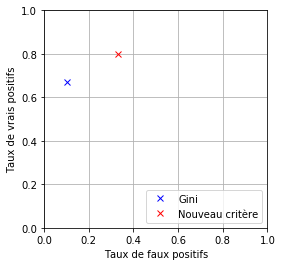

In [2]:
plt.figure(figsize=(4, 4))
#plt.plot([], [], 'x')#, label='ROC curve (area = %0.2f)' % roc_auc_ab)
plt.plot([.1], [.67], 'bx', label='Gini')#color='navy', lw=lw, linestyle='--')
plt.plot([.33], [.8], 'rx', label='Nouveau critère')#color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1])
#plt.yticks(np.arange(0, 1, .1))
#plt.xticks(np.arange(0, 1, .05))
plt.ylim([0.0, 1])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
#plt.title('Courbe ROC')
plt.grid()
plt.legend(loc="lower right")
#plt.savefig('roc_dt.png')
plt.show()

### Chargement des fichier train et test

csv_X_train = './Data_notebook/Data_train_1.csv'
csv_Y_train = './Data_notebook/Data_train_Y_1.csv'
csv_X_test = './Data_notebook/Data_test_1.csv'
csv_Y_test = './Data_notebook/Data_test_Y_1.csv'

csv_X_train = './Data_notebook/Data_train_3.csv'
csv_Y_train = './Data_notebook/Data_train_Y_3.csv'
csv_X_test = './Data_notebook/Data_test_3.csv'
csv_Y_test = './Data_notebook/Data_test_Y_3.csv'

In [3]:
csv_X_train = './Data_notebook/Data_train_4.csv'
csv_Y_train = './Data_notebook/Data_train_Y_4.csv'
csv_X_test = './Data_notebook/Data_test_4.csv'
csv_Y_test = './Data_notebook/Data_test_Y_4.csv'

In [4]:
data_X_train = pd.read_csv(csv_X_train, sep=';')
data_X_train.info()
data_X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 35 columns):
SEC_ID                   3774 non-null int64
DN                       3774 non-null int64
epaisseur                3774 non-null float64
pression_max             3774 non-null float64
pression_exploitation    3774 non-null float64
annee_pose               3774 non-null int64
revetement_int           3774 non-null int64
revetement               3774 non-null int64
terrain_clc              3774 non-null int64
terrain_niv1_clc         3774 non-null int64
terrain_niv2_clc         3774 non-null int64
CODE_socle               3774 non-null float64
ALEAN_sedim              3774 non-null float64
distance_route           3774 non-null float64
vocation_route           3774 non-null int64
nbChausse_route          3774 non-null int64
nbVoies_route            3774 non-null int64
etat_route               3774 non-null int64
sens_route               3774 non-null int64
classe_route             3

,SEC_ID,DN,epaisseur,pression_max,pression_exploitation,annee_pose,revetement_int,revetement,terrain_clc,terrain_niv1_clc,...,typeMesure_pc,courantVagabond_pc,courantAlter_pc,En_pc,EonMoyen_pc,EoffMoyen_pc,UcanaMoyen_pc,IDCMoyen_pc,JDCdonnee_pc,age
0,6,100,3.2,113.9,67.7,1994,0,3,242,2,...,2,2,2,-539.064516,-2399.451613,-1211.032258,1.088387,2.040645,0.408129,19
1,7,100,3.2,113.9,67.7,1994,0,3,242,2,...,2,2,2,-537.677419,-2379.741935,-1216.838710,1.078065,2.006774,0.401355,19
2,31,100,3.2,113.9,67.7,1994,0,3,112,1,...,2,2,2,-504.387097,-1906.709677,-1356.193548,0.830323,1.193871,0.238774,19
3,33,100,3.2,113.9,67.7,1994,0,3,231,2,...,2,2,2,-537.125000,-1882.155556,-1356.266667,0.948750,1.169111,0.233822,19
4,165,100,3.2,113.9,67.7,1994,0,3,211,2,...,1,2,2,-591.000000,-2574.000000,-1111.500000,1.350000,2.870000,0.654000,19


In [5]:
data_Y_train = pd.read_csv(csv_Y_train, sep=';')
data_Y_train['dateExcavation_exc'] = pd.to_datetime(data_Y_train['dateExcavation_exc'])
data_Y_train.info()
data_Y_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 9 columns):
SEC_ID                3774 non-null int64
dateExcavation_exc    3774 non-null datetime64[ns]
EXC_ID                3774 non-null object
atteinte_exc          3774 non-null int64
cor_att_exc           3774 non-null int64
corrosion_exc         3774 non-null int64
nb_atteinte_exc       3774 non-null int64
nb_cor_att_exc        3774 non-null int64
nb_corrosion_exc      3774 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 265.4+ KB


,SEC_ID,dateExcavation_exc,EXC_ID,atteinte_exc,cor_att_exc,corrosion_exc,nb_atteinte_exc,nb_cor_att_exc,nb_corrosion_exc
0,6,2013-09-02,"(920, 921, 922)",0,1,1,0,3,3
1,7,2013-09-02,"(927, 928)",0,1,1,0,2,2
2,31,2013-09-02,"(929, 930, 931)",0,1,1,0,3,3
3,33,2013-09-02,"(932,)",0,1,1,0,1,1
4,165,2013-09-02,"(945,)",1,1,0,1,1,0


In [6]:
data_X_test = pd.read_csv(csv_X_test, sep=';', encoding='latin-1')
data_X_test.info()
data_X_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 35 columns):
SEC_ID                   1536 non-null int64
DN                       1536 non-null int64
epaisseur                1536 non-null float64
pression_max             1536 non-null float64
pression_exploitation    1536 non-null float64
annee_pose               1536 non-null int64
revetement_int           1536 non-null int64
revetement               1536 non-null int64
terrain_clc              1536 non-null int64
terrain_niv1_clc         1536 non-null int64
terrain_niv2_clc         1536 non-null int64
CODE_socle               1536 non-null float64
ALEAN_sedim              1536 non-null float64
distance_route           1536 non-null float64
vocation_route           1536 non-null int64
nbChausse_route          1536 non-null int64
nbVoies_route            1536 non-null int64
etat_route               1536 non-null int64
sens_route               1536 non-null int64
classe_route             1

,SEC_ID,DN,epaisseur,pression_max,pression_exploitation,annee_pose,revetement_int,revetement,terrain_clc,terrain_niv1_clc,...,typeMesure_pc,courantVagabond_pc,courantAlter_pc,En_pc,EonMoyen_pc,EoffMoyen_pc,UcanaMoyen_pc,IDCMoyen_pc,JDCdonnee_pc,age
0,350,500,5.8,75.20,67.7,1967,0,1,242,2,...,2,2,1,-362.444444,-4794.666667,-1037.666667,1.311111,0.663333,0.026533,49
1,419,500,5.8,75.20,67.7,1967,0,1,231,2,...,2,2,1,-467.714286,-913.857143,-706.285714,0.062571,0.174000,0.006960,49
2,3364,300,6.1,80.77,67.7,1977,0,1,231,2,...,2,2,1,-501.111111,-1493.888889,-942.666667,0.945556,0.565333,0.022613,39
3,3439,300,6.1,80.77,67.7,1977,0,1,242,2,...,2,2,1,-600.000000,-1177.000000,-1177.000000,0.800000,0.737000,0.029480,39
4,3498,300,5.2,80.77,67.7,1977,0,1,242,2,...,1,0,0,-560.272551,-1933.000000,-1114.000000,0.697595,0.754345,0.092091,39


In [7]:
data_Y_test = pd.read_csv(csv_Y_test, sep=';')
data_Y_test.info()
data_Y_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 9 columns):
SEC_ID                1536 non-null int64
dateExcavation_exc    1536 non-null object
EXC_ID                1536 non-null object
atteinte_exc          1536 non-null int64
cor_att_exc           1536 non-null int64
corrosion_exc         1536 non-null int64
nb_atteinte_exc       1536 non-null int64
nb_cor_att_exc        1536 non-null int64
nb_corrosion_exc      1536 non-null int64
dtypes: int64(7), object(2)
memory usage: 108.1+ KB


,SEC_ID,dateExcavation_exc,EXC_ID,atteinte_exc,cor_att_exc,corrosion_exc,nb_atteinte_exc,nb_cor_att_exc,nb_corrosion_exc
0,350,2016-09-19,"(2522, 2523, 2534, 2535)",0,0,0,0,0,0
1,419,2016-09-12,"(2521,)",0,0,0,0,0,0
2,3364,2016-09-13,"(2258,)",1,1,0,1,1,0
3,3439,2016-05-30,"(2594,)",0,0,0,0,0,0
4,3498,2016-07-18,"(2603,)",0,0,0,0,0,0


In [8]:
csv_X_train_mes = './Data_notebook/train_mes_X_duplicates.csv'
csv_Y_train_mes = './Data_notebook/train_mes_Y_duplicates.csv'
csv_X_test_mes = './Data_notebook/test_mes_X_duplicates.csv'
csv_Y_test_mes = './Data_notebook/test_mes_Y_duplicates.csv'

In [9]:
data_X_train_mes = pd.read_csv(csv_X_train_mes, sep=';')
data_X_train_mes.info()
data_X_train_mes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 28 columns):
SEC_ID                      1520 non-null int64
epaisseur                   1520 non-null float64
pression_max                1520 non-null float64
distance_route              1520 non-null float64
intensite_rteA              1520 non-null float64
intensite_rteS              1520 non-null float64
distances_fer               1520 non-null float64
En_pc                       1520 non-null float64
EonMoyen_pc                 1520 non-null float64
EoffMoyen_pc                1520 non-null float64
UcanaMoyen_pc               1520 non-null float64
IDCMoyen_pc                 1520 non-null float64
JDCdonnee_pc                1520 non-null float64
age                         1520 non-null int64
gradientContinuMax_mes      1520 non-null float64
IR%_mes                     1520 non-null float64
DN                          1520 non-null int64
CODE_socle                  1520 non-null float64

,SEC_ID,epaisseur,pression_max,distance_route,intensite_rteA,intensite_rteS,distances_fer,En_pc,EonMoyen_pc,EoffMoyen_pc,...,ALEAN_sedim,vocation_route,revetement_int,revetement,nature_fer,energie_fer,courantVagabond_pc,courantAlter_pc,Presence_site_SEVESO_tre,Type_zone_humide_tre
0,162095,4.9,130.80,982.574788,0.010578,0.010578,2993.269608,-559.042254,-1846.361111,-1109.917044,...,-1.0,1,0,3,1,0,0,0,0,3
1,173222,4.5,43.20,2.822530,0.047912,0.047912,566.160966,-559.042254,-1846.361111,-1109.917044,...,-1.0,1,1,1,1,0,0,0,0,3
2,174193,4.3,75.22,86.212788,0.242742,0.242742,0.000000,-720.000000,-1527.500000,-1218.000000,...,-1.0,2,0,3,1,0,2,2,0,3
3,174639,3.2,101.04,206.849381,0.081308,0.081308,967.241327,-698.000000,-2197.375000,-1221.600000,...,-1.0,0,0,2,1,0,2,1,0,3
4,174662,3.2,101.04,498.230217,0.065755,0.065755,29.057989,-740.000000,-2510.000000,-1251.000000,...,-1.0,1,0,2,1,0,2,1,0,3


In [10]:
data_Y_train_mes = pd.read_csv(csv_Y_train_mes, sep=';')
data_Y_train_mes.info()
data_Y_train_mes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 11 columns):
SEC_ID                1520 non-null int64
nbDefaut_exc          1520 non-null int64
defaut_exc            1520 non-null int64
dateExcavation_exc    1520 non-null object
EXC_ID                1520 non-null object
atteinte_exc          1520 non-null int64
cor_att_exc           1520 non-null int64
corrosion_exc         1520 non-null int64
nb_atteinte_exc       1520 non-null int64
nb_cor_att_exc        1520 non-null int64
nb_corrosion_exc      1520 non-null int64
dtypes: int64(9), object(2)
memory usage: 130.7+ KB


,SEC_ID,nbDefaut_exc,defaut_exc,dateExcavation_exc,EXC_ID,atteinte_exc,cor_att_exc,corrosion_exc,nb_atteinte_exc,nb_cor_att_exc,nb_corrosion_exc
0,162095,0,0,2013-01-25,"(5715,)",0,0,0,0,0,0
1,173222,0,0,2013-12-04,"(5851,)",0,0,0,0,0,0
2,174193,0,0,2013-12-03,"(5848,)",0,0,0,0,0,0
3,174639,0,0,2013-11-18,"(5839,)",0,0,0,0,0,0
4,174662,0,0,2013-12-05,"(5849,)",0,0,0,0,0,0


In [11]:
data_X_test_mes = pd.read_csv(csv_X_test_mes, sep=';', encoding='latin-1')
data_X_test_mes.info()
data_X_test_mes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 28 columns):
SEC_ID                      744 non-null int64
epaisseur                   744 non-null float64
pression_max                744 non-null float64
distance_route              744 non-null float64
intensite_rteA              744 non-null float64
intensite_rteS              744 non-null float64
distances_fer               744 non-null float64
En_pc                       744 non-null float64
EonMoyen_pc                 744 non-null float64
EoffMoyen_pc                744 non-null float64
UcanaMoyen_pc               744 non-null float64
IDCMoyen_pc                 744 non-null float64
JDCdonnee_pc                744 non-null float64
age                         744 non-null int64
gradientContinuMax_mes      744 non-null float64
IR%_mes                     744 non-null float64
DN                          744 non-null int64
CODE_socle                  744 non-null float64
ALEAN_sedim        

,SEC_ID,epaisseur,pression_max,distance_route,intensite_rteA,intensite_rteS,distances_fer,En_pc,EonMoyen_pc,EoffMoyen_pc,...,ALEAN_sedim,vocation_route,revetement_int,revetement,nature_fer,energie_fer,courantVagabond_pc,courantAlter_pc,Presence_site_SEVESO_tre,Type_zone_humide_tre
0,3364,6.1,80.77,213.106183,0.023166,0.023166,6932.243457,-501.111111,-1493.888889,-942.666667,...,0.0,3,0,1,1,0,2,1,1,3
1,3439,6.1,80.77,0.000000,0.175680,0.175680,10627.063795,-600.000000,-1177.000000,-1177.000000,...,0.0,0,0,1,1,0,2,1,1,3
2,3498,5.2,80.77,718.081834,0.982624,0.982624,13508.208784,-559.042254,-1846.361111,-1109.917044,...,0.0,3,0,1,1,0,0,0,1,3
3,3531,5.2,80.77,646.295875,3.581302,3.581302,14926.515599,-559.042254,-1846.361111,-1109.917044,...,0.0,3,0,1,1,0,0,0,1,3
4,3537,5.2,80.77,541.472675,2.627306,2.627306,15096.714624,-559.042254,-1846.361111,-1109.917044,...,0.0,3,0,1,1,0,0,0,1,3


In [12]:
data_Y_test_mes = pd.read_csv(csv_Y_test_mes, sep=';')
data_Y_test_mes.info()
data_Y_test_mes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 11 columns):
SEC_ID                744 non-null int64
nbDefaut_exc          744 non-null int64
defaut_exc            744 non-null int64
dateExcavation_exc    744 non-null object
EXC_ID                744 non-null object
atteinte_exc          744 non-null int64
cor_att_exc           744 non-null int64
corrosion_exc         744 non-null int64
nb_atteinte_exc       744 non-null int64
nb_cor_att_exc        744 non-null int64
nb_corrosion_exc      744 non-null int64
dtypes: int64(9), object(2)
memory usage: 64.0+ KB


,SEC_ID,nbDefaut_exc,defaut_exc,dateExcavation_exc,EXC_ID,atteinte_exc,cor_att_exc,corrosion_exc,nb_atteinte_exc,nb_cor_att_exc,nb_corrosion_exc
0,3364,1,1,2016-09-13,"(2258,)",1,1,0,1,1,0
1,3439,0,0,2016-05-30,"(2594,)",0,0,0,0,0,0
2,3498,0,0,2016-07-18,"(2603,)",0,0,0,0,0,0
3,3531,0,0,2016-05-31,"(2098,)",0,0,0,0,0,0
4,3537,0,0,2016-05-30,"(2097,)",0,0,0,0,0,0


In [13]:
col_X_init = data_X_train.columns
col_Y_init = data_Y_train.columns
col_X_mes = data_X_train_mes.columns
col_Y_mes = data_Y_train_mes.columns
dif_col = list(set(col_X_mes) - set(col_X_init)) + ['SEC_ID']
dif_col

['gradientContinuMax_mes',
 'Type_zone_humide_tre',
 'IR%_mes',
 'Presence_site_SEVESO_tre',
 'SEC_ID']

In [14]:
data_X_train_new = pd.merge(data_X_train, data_X_train_mes[dif_col], on='SEC_ID')
data_X_train_new.info()
data_X_train_new.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 0 to 1519
Data columns (total 39 columns):
SEC_ID                      1520 non-null int64
DN                          1520 non-null int64
epaisseur                   1520 non-null float64
pression_max                1520 non-null float64
pression_exploitation       1520 non-null float64
annee_pose                  1520 non-null int64
revetement_int              1520 non-null int64
revetement                  1520 non-null int64
terrain_clc                 1520 non-null int64
terrain_niv1_clc            1520 non-null int64
terrain_niv2_clc            1520 non-null int64
CODE_socle                  1520 non-null float64
ALEAN_sedim                 1520 non-null float64
distance_route              1520 non-null float64
vocation_route              1520 non-null int64
nbChausse_route             1520 non-null int64
nbVoies_route               1520 non-null int64
etat_route                  1520 non-null int64
sens_route       

,SEC_ID,DN,epaisseur,pression_max,pression_exploitation,annee_pose,revetement_int,revetement,terrain_clc,terrain_niv1_clc,...,EonMoyen_pc,EoffMoyen_pc,UcanaMoyen_pc,IDCMoyen_pc,JDCdonnee_pc,age,gradientContinuMax_mes,Type_zone_humide_tre,IR%_mes,Presence_site_SEVESO_tre
0,162095,100,4.9,130.80,67.7,2012,0,3,324,3,...,-1933.000,-1114.0,0.697595,0.754345,0.092091,1,0.9,3,0.300000,0
1,173222,150,4.5,43.20,39.7,1961,1,1,121,1,...,-1933.000,-1114.0,0.697595,0.754345,0.092091,52,6.0,3,0.759428,0
2,174193,200,4.3,75.22,67.7,1990,0,3,211,2,...,-1527.500,-1218.0,1.400000,0.770000,0.154000,23,63.0,3,3.835000,0
3,174639,80,3.2,101.04,67.7,1972,0,2,211,2,...,-2197.375,-1221.6,1.300250,1.071250,0.214250,41,9.0,3,0.676692,0
4,174662,80,3.2,101.04,67.7,1972,0,2,112,1,...,-2510.000,-1251.0,1.300000,1.780000,0.356000,41,3.2,3,0.202549,0


In [15]:
data_X_test_new = pd.merge(data_X_test, data_X_test_mes[dif_col], on='SEC_ID')
data_X_test_new.info()
data_X_test_new.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 743
Data columns (total 39 columns):
SEC_ID                      744 non-null int64
DN                          744 non-null int64
epaisseur                   744 non-null float64
pression_max                744 non-null float64
pression_exploitation       744 non-null float64
annee_pose                  744 non-null int64
revetement_int              744 non-null int64
revetement                  744 non-null int64
terrain_clc                 744 non-null int64
terrain_niv1_clc            744 non-null int64
terrain_niv2_clc            744 non-null int64
CODE_socle                  744 non-null float64
ALEAN_sedim                 744 non-null float64
distance_route              744 non-null float64
vocation_route              744 non-null int64
nbChausse_route             744 non-null int64
nbVoies_route               744 non-null int64
etat_route                  744 non-null int64
sens_route                  744 non-n

,SEC_ID,DN,epaisseur,pression_max,pression_exploitation,annee_pose,revetement_int,revetement,terrain_clc,terrain_niv1_clc,...,EonMoyen_pc,EoffMoyen_pc,UcanaMoyen_pc,IDCMoyen_pc,JDCdonnee_pc,age,gradientContinuMax_mes,Type_zone_humide_tre,IR%_mes,Presence_site_SEVESO_tre
0,3364,300,6.1,80.77,67.7,1977,0,1,231,2,...,-1493.888889,-942.666667,0.945556,0.565333,0.022613,39,52.000000,3,4.200000,1
1,3439,300,6.1,80.77,67.7,1977,0,1,242,2,...,-1177.000000,-1177.000000,0.800000,0.737000,0.029480,39,655.000000,3,43.690000,1
2,3498,300,5.2,80.77,67.7,1977,0,1,242,2,...,-1933.000000,-1114.000000,0.697595,0.754345,0.092091,39,84.882353,3,11.151765,1
3,3531,300,5.2,80.77,67.7,1977,0,1,211,2,...,-1933.000000,-1114.000000,0.697595,0.754345,0.092091,39,47.000000,3,6.360000,1
4,3537,300,5.2,80.77,67.7,1977,0,1,211,2,...,-1933.000000,-1114.000000,0.697595,0.754345,0.092091,39,152.500000,3,20.580000,1


### Modele avec Random Forest

#var_retenu = data_X_train.columns
var_retenu = list(set(data_X_train_mes.columns) - set(['CODE_socle', 'ALEAN_sedim']))

#var_retenu = ['DN', 'revetement']
X_train = data_X_train_mes[var_retenu]
#X_train = X_train[data_Y_train['dateExcavation_exc'].dt.year != 2013]
#X_train['revetement'] = X_train['revetement'].astype('category') atteinte_exc
Y_train = data_Y_train_mes['cor_att_exc']
#Y_train = Y_train[data_Y_train['dateExcavation_exc'].dt.year != 2013]
#Y_train = data_Y_train['corrosion_exc']
#Y_train = data_Y_train['atteinte_exc']



X_test = data_X_test_mes[var_retenu]
#X_test['revetement'] = X_test['revetement'].astype('category')

#Y_test = data_Y_test['atteinte_exc']
#Y_test = data_Y_test['corrosion_exc']
Y_test = data_Y_test_mes['cor_att_exc']


print('train : ', X_train.shape, ' test : ', X_test.shape)

In [16]:
#var_retenu = data_X_train_new.columns
var_retenu = list(set(data_X_train_new.columns) - set(['CODE_socle', 'ALEAN_sedim']))

#var_retenu = ['DN', 'revetement']
X_train = data_X_train_new[var_retenu]
#X_train = X_train[data_Y_train['dateExcavation_exc'].dt.year != 2013]
#X_train['revetement'] = X_train['revetement'].astype('category') atteinte_exc
Y_train = data_Y_train_mes['cor_att_exc']
#Y_train = Y_train[data_Y_train['dateExcavation_exc'].dt.year != 2013]
#Y_train = data_Y_train['corrosion_exc']
#Y_train = data_Y_train['atteinte_exc']



X_test = data_X_test_new[var_retenu]
#X_test['revetement'] = X_test['revetement'].astype('category')

#Y_test = data_Y_test['atteinte_exc']
#Y_test = data_Y_test['corrosion_exc']
Y_test = data_Y_test_mes['cor_att_exc']


print('train : ', X_train.shape, ' test : ', X_test.shape)

train :  (1520, 37)  test :  (744, 37)


In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 743
Data columns (total 37 columns):
intensite_rteS              744 non-null float64
energie_fer                 744 non-null int64
DN                          744 non-null int64
courantVagabond_pc          744 non-null int64
etat_route                  744 non-null int64
revetement                  744 non-null int64
pression_max                744 non-null float64
epaisseur                   744 non-null float64
nbChausse_route             744 non-null int64
nature_fer                  744 non-null int64
IDCMoyen_pc                 744 non-null float64
JDCdonnee_pc                744 non-null float64
terrain_niv2_clc            744 non-null int64
courantAlter_pc             744 non-null int64
En_pc                       744 non-null float64
sens_route                  744 non-null int64
age                         744 non-null int64
Type_zone_humide_tre        744 non-null int64
IR%_mes                     744 non-n

In [18]:
ab_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=None), n_estimators = 50, random_state=7)
#ab_clf = RandomForestClassifier(n_estimators=40, max_depth=None)
ab_clf.fit(X_train, Y_train)

preds_ad = ab_clf.predict(X_test)
preds_ad_train = ab_clf.predict(X_train)
print(ab_clf.score(X_train, Y_train))
print(ab_clf.score(X_test, Y_test))

0.994736842105
0.868279569892


In [19]:
cm_ad = confusion_matrix(preds_ad, Y_test)
cm_ad

array([[642,  72],
       [ 26,   4]])

In [20]:
Y_train.value_counts() / len(Y_train)

0    0.896053
1    0.103947
Name: cor_att_exc, dtype: float64

In [21]:
Y_test.value_counts() / len(Y_test)

0    0.897849
1    0.102151
Name: cor_att_exc, dtype: float64

In [39]:
nb_min = (Y_train_np == 1).sum()
nb_max = len(Y_train_np) - nb_min
D = np.array(Y_train_np)
#D = .5 * np.array(list(map(lambda x : 1/nb_max if (x == 0) else 1/nb_min, D)))
D = np.array(list(map(lambda x : .5/nb_max if (x == 0) else .5/nb_min, D)))


In [40]:

clf_perso = DecisionTree(max_depth=3, seuil_equilibre=.3,seuil_split_min_cl=.7, seuil_decision=.17, nb_min_max=6)

clf_perso.fit(X_train_np, Y_train_np, None)

preds_pb = clf_perso.predict_proba(X_test_np)

fpr, tpr, _ = metrics.roc_curve(Y_test, preds_pb)
roc_auc = metrics.auc(fpr, tpr)

In [41]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion ='entropy', max_depth=3, min_samples_leaf=100)
clf_g = tree.DecisionTreeClassifier(criterion ='gini', max_depth=3, min_samples_leaf=100)

#clf = clf.fit(iris.data, iris.target)
clf = clf.fit(X_train, Y_train)
clf_g = clf_g.fit(X_train, Y_train)

preds_train = clf.predict(X_train)

preds = clf.predict(X_test)
preds_dt_sk_ent = clf.predict_proba(X_test)[:, 1]
preds_dt_sk_ent_g = clf_g.predict_proba(X_test)[:, 1]

#print(iris.feature_names)
print(clf.score(X_test, Y_test))
cm_ad_train = confusion_matrix(preds_train, Y_train)
cm_ad = confusion_matrix(preds, Y_test)

print('test cm : \n', cm_ad)
print('train cm : \n', cm_ad_train)

0.891129032258
test cm : 
 [[639  52]
 [ 29  24]]
train cm : 
 [[1333   72]
 [  29   86]]


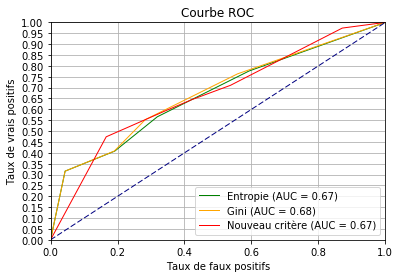

In [42]:
fpr_ab, tpr_ab, t = metrics.roc_curve(Y_test, preds_dt_sk_ent)
fpr_ab_g, tpr_ab_g, t_g = metrics.roc_curve(Y_test, preds_dt_sk_ent_g)

roc_auc_ab = metrics.auc(fpr_ab, tpr_ab)
roc_auc_ab_g = metrics.auc(fpr_ab_g, tpr_ab_g)

roc_auc_ab
#print(fpr_ab, tpr_ab, t)

plt.figure()
lw = 1
plt.plot(fpr_ab, tpr_ab, color='green', lw=lw, label='Entropie (AUC = %0.2f)' % roc_auc_ab)
plt.plot(fpr_ab_g, tpr_ab_g, color='orange', lw=lw, label='Gini (AUC = %0.2f)' % roc_auc_ab_g)
plt.plot(fpr, tpr, color='red', lw=lw, label='Nouveau critère (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.yticks(np.arange(0, 1.05, .05))

plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.grid()
plt.legend(loc="lower right")
#plt.savefig('roc_dt_entr_gin_new_5.png')
plt.show()

In [ ]:
Y_test.value_counts() / Y_test.count()

In [ ]:
i = 1

In [ ]:
dot_data = tree.export_graphviz(clf_g, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
i = i + 1
#graph.write_pdf('POL51_' + str(i) + '.pdf')

In [ ]:
i = i + 1
clf_perso.to_pdf('POL51_' + str(i) + '.pdf')

In [ ]:
X_train['revetement'].unique()

### Arbre de decision personnalisé

In [34]:
import decisiontree
from collections import Counter

import numpy as np
from collections import Counter
#import pydot  #pour l'affichage graphique d'arbres
import pydotplus
#import cPickle

###############################
# Fonctions auxiliaires
###############################

def p_log_p(freq):
    """ fonction pour calculer \sum p_i log(p_i) """
    return np.nan_to_num(np.sum(freq*np.log2(freq)))

def entropy(y):
    """ calcul de l'entropie d'un ensemble
    """
    ylen = float(y.size)
    if ylen <= 1:
        return 0

    freq = np.array(list(Counter(y).values()))/ylen
    return -p_log_p(freq)
    
def taux_cl_min_max(y_left, y_right, min_class=1) :
    c_min_left = (y_left == min_class).sum() / len(y_left)
    c_min_right = (y_right == min_class).sum() / len(y_right)
    
    return max(c_min_left, c_min_right)

#y = np.array([1, 1, 1, 0, 0])    
#print(entropy(y))

def entropy_cond(y_list):
    h, total = 0.,0.
    for y in y_list:
        h += len(y)*entropy(y)
        total += len(y)
    return h/total

###############################
# Classes
###############################


class Classifier(object):
    """ Classe generique d'un classifieur
        Dispose de 3 méthodes :
            fit pour apprendre
            predict pour predire
            score pour evaluer la precision
    """
    def fit(self,data,y):
        raise NotImplementedError("fit non  implemente")
    def predict(self,data):
        raise NotImplementedError("predict non implemente")
    def score(self,data,y):
        return (self.predict(data)==y).mean()


class Split(object):
    """ Permet de coder un split pour une variable continue
    """
    def __init__(self,idvar=None,threshold=None,gain=None):
        """
        :param idvar: numero de la variable de split
        :param threshold: seuil
        :param gain: gain d'information du split
        :return:
        """
        self.idvar=idvar
        self.threshold=threshold
        self.gain=gain

    def predict(self,data):
        """ Prediction pour une matrice d'exemples, -1 si <= threshold, +1 sinon
        :param x: matrice d'exemples
        :return: vecteur des labels
        """
        if len(data.shape)==1:
            data=data.reshape((1,data.shape[0]))
        #print('threshold : ', self.threshold)
        return [-1 if data[i,self.idvar]<=self.threshold else 1 for i in range(data.shape[0])]

    @staticmethod
    def best_gain(x,y):
        """  calcul le meilleur seuil pour la colonne x (1-dimension) et les labels y
        :param x: vecteur 1d des donnees
        ;param y: vecteur des labels
        :return:
        """
        ylen = float(y.size)
        idx_sorted = np.argsort(x)
        h=entropy(y)
        xlast=x[idx_sorted[0]]
        split_val=x[idx_sorted[0]]
        hmin = h
        for i in range(y.size):
            if x[idx_sorted[i]]!=xlast:
                htmp = entropy_cond([y[idx_sorted[:i]], y[idx_sorted[i:]]])
                if htmp<hmin:
                    hmin=htmp
                    split_val=(xlast+x[idx_sorted[i]])/2.
            xlast=x[idx_sorted[i]]
        return (h-hmin/ylen),split_val

    @staticmethod
    def best_gain_2(x,y, seuil_equilibre, seuil_split_min_cl):
        """  calcul le meilleur seuil pour la colonne x (1-dimension) et les labels y
        :param x: vecteur 1d des donnees
        ;param y: vecteur des labels
        :return:
        """
        min_class = 1
        ylen = float(y.size)
        y_count = Counter(y)
        nb_min_cl_sample = y_count[min_class]
        proba_min_cl_total = nb_min_cl_sample / ylen
        #seuil_equilibre = .3
        #seuil_split_min_cl = .8
        #print(proba_min_cl_total)

        idx_sorted = np.argsort(x)
        h=entropy(y)
        xlast=x[idx_sorted[0]]
        split_val=x[idx_sorted[0]]
        p_max = 0
        hmin = h
        for i in range(y.size):
            if x[idx_sorted[i]]!=xlast:
                y_left = y[idx_sorted[:i]]
                y_right = y[idx_sorted[i:]]
                nb_sample_min_cl_left = (y_left == min_class).sum()
                nb_sample_min_cl_right = (y_right == min_class).sum()

                #print('proba_min_cl_total', proba_min_cl_total)
                if proba_min_cl_total >= seuil_equilibre :
                    if (nb_sample_min_cl_left > nb_sample_min_cl_right) :
                        p_tmp = nb_sample_min_cl_left / len(y_left)
                    if (nb_sample_min_cl_left <= nb_sample_min_cl_right) :
                        p_tmp = nb_sample_min_cl_right / len(y_right)
                    #print('cas 1 : ', p_tmp)
                    if p_max < p_tmp:
                        p_max = p_tmp
                        split_val=(xlast+x[idx_sorted[i]])/2.
                else :
                    c_min_left = nb_sample_min_cl_left / nb_min_cl_sample
                    c_min_right = nb_sample_min_cl_right / nb_min_cl_sample
                    
                    #print((y_left == min_class).sum(), (y_right == min_class).sum())
                    if max(c_min_left, c_min_right) >= seuil_split_min_cl :
                        if (nb_sample_min_cl_left > nb_sample_min_cl_right) :
                            p_tmp = nb_sample_min_cl_left / len(y_left)
                        if (nb_sample_min_cl_left <= nb_sample_min_cl_right) :
                            p_tmp = nb_sample_min_cl_right / len(y_right)
                        #p_tmp = taux_cl_min_max(y_left, y_right, min_class)
                        if p_max < p_tmp:
                            p_max = p_tmp
                            #print('cas 2 : ', max(c_min_left, c_min_right), p_tmp)

                            split_val=(xlast+x[idx_sorted[i]])/2.
            xlast=x[idx_sorted[i]]
        return p_max,split_val
        

    @staticmethod
    def find_best_split(data, y, seuil_equilibre, seuil_split_min_cl):
        if len(data.shape)==1:
            data = data.reshape((1,data.shape[0]))
        hlist = [[Split.best_gain_2(data[:,i],y, seuil_equilibre, seuil_split_min_cl),i] for i in range(data.shape[1])]
        (h,threshold),idx= max(hlist)
        #print('best split : ', (h,threshold),idx)
        return Split(idx,threshold,h)

    def __str__(self):
        return "var %s, thresh %f (gain %f)" %(self.idvar,self.threshold, self.gain)

class Node(Classifier):
    """ Noeud d'un arbre
    """
    def __init__(self, split=None, parent=None, left=None, right=None, leaf=True, depth=-1, label=None, seuil_equilibre=.3, seuil_split_min_cl=.8, seuil_decision=.17, **kwargs):
        """
        :param split:  split du noeud
        :param parent: noeud parent, None si root
        :param left: fils gauche
        :param right: fils droit
        :param leaf: boolean vrai si feuille
        :param depth: profondeur
        :param label: label preponderant
        :return:
        """
        self.split, self.parent, self.left, self.right, self.leaf, self.label, self.depth = \
                                            split, parent, left, right, leaf, label, depth
        self.info = dict(kwargs)
        self.seuil_equilibre = seuil_equilibre
        self.seuil_split_min_cl = seuil_split_min_cl
        self.proba = None
        self.seuil_decision = seuil_decision

    def predict(self,data):
        if len(data.shape)==1:
            data=data.reshape((1,data.shape[0]))
        if self.leaf:
            return [self.label]*data.shape[0]
        return [self.left.predict(data[i,:])[0] if res<0 else self.right.predict(data[i,:])[0]
                for i, res in enumerate(self.split.predict(data))]
    
    def predict_proba(self,data):
        if len(data.shape)==1:
            data=data.reshape((1,data.shape[0]))
        if self.leaf:
            return [self.proba]*data.shape[0]
        return [self.left.predict_proba(data[i,:])[0] if res<0 else self.right.predict_proba(data[i,:])[0]
                for i, res in enumerate(self.split.predict(data))]


    def fit(self, data, y):
        counts=Counter(y)
        self.split=Split.find_best_split(data, y, self.seuil_equilibre, self.seuil_split_min_cl)
        #self.label = counts.most_common()[0][0]
        self.label = 1 if (counts[1] / len(y)) > self.seuil_decision else 0
        self.proba = counts[1] / len(y)

    def __str__(self):
        if self.leaf:
            return "Leaf : %s" % (self.label,)
        return "Node : %s (%s)" % (self.split,self.info)

class DecisionTree(Classifier):
    """ Arbre de decision
    """

    def __init__(self,max_depth=30,min_samples_split=10,seuil_equilibre=.3,seuil_split_min_cl=.8, seuil_decision=.17):
        """
        :param max_depth: profondeur max
        :param min_samples_split:  nombre d'exemples minimal pour pouvoir spliter le noeud
        :return:
        """
        self.max_depth, self.min_samples_split = max_depth, min_samples_split
        self.root = None
        self.seuil_equilibre = seuil_equilibre
        self.seuil_split_min_cl = seuil_split_min_cl
        self.seuil_decision = seuil_decision

    def fit(self,data,y, sample_weight=None):
        """ apprentissage de l'arbre de maniere iterative
        on apprend un noeud, puis on cree les deux enfants de ce noeud, que l'on ajoute a la pile des noeuds
        a traiter par la suite (nodes_to_treat), ainsi que les index des exemples associes (dic_idx)
        """
        self.root = Node(depth=0, seuil_equilibre=self.seuil_equilibre, seuil_split_min_cl=self.seuil_split_min_cl, seuil_decision=self.seuil_decision)
        nodes_to_treat = [self.root]
        if (sample_weight is not None) :
            #print(np.random.choice(len(y), len(y), sample_weight))
            idx = np.unique(np.random.choice(a=len(y), size=len(y), p=sample_weight))
        else : 
            idx = range(len(y))
        #print('taille train : ', len(idx))
        #print('Distribution classe : ', Counter(y[idx]))
        dic_idx = dict({self.root : idx})
        while len(nodes_to_treat)>0:
            # recuperation du noeud courant
            curnode = nodes_to_treat.pop()
            #recuperation de la liste des indices des exemples associes, x[idx_train,:] contient l'ensemble des
            #exemples a traiter
            idx_train = dic_idx.pop(curnode)
            # infos complementaires sur le nombre d'exemples en apprentissage par label
            for lab,clab in Counter(y[idx_train]).items():
                curnode.info[lab]=clab
            curnode.fit(data[idx_train,:],y[idx_train])
            # recupere les predictions pour partager entre fils droit et gauche les exemples
            pred = curnode.split.predict(data[idx_train,:])
            l_idx = [ idx_train[i] for i in range(len(idx_train)) if pred[i]<0 ]
            r_idx = list(set(idx_train).difference(l_idx))
            
            #print(len(idx_train))
            #print(Counter(pred))
            #Condition d'arrets
            if curnode.split.gain==1 or curnode.depth >= self.max_depth or \
                    len(l_idx) < self.min_samples_split or len(r_idx) < self.min_samples_split or np.sum(y[idx_train]) < self.min_samples_split :
                curnode.leaf=True
                #print('condition d arret : ', curnode.split.gain, curnode.depth, len(l_idx), len(r_idx))
                continue
            #Creation des deux enfants
            curnode.left = Node(parent=curnode,depth=curnode.depth+1, seuil_equilibre=self.seuil_equilibre, seuil_split_min_cl=self.seuil_split_min_cl, seuil_decision=self.seuil_decision)
            curnode.right = Node(parent=curnode,depth=curnode.depth+1, seuil_equilibre=self.seuil_equilibre, seuil_split_min_cl=self.seuil_split_min_cl, seuil_decision=self.seuil_decision)
            curnode.leaf = False
            #On enregistre les indices correspondant aux deux noeuds
            dic_idx[curnode.left]=l_idx
            dic_idx[curnode.right]=r_idx
            #On ajoute les deux enfants a la liste des noeuds a traiter
            nodes_to_treat = [curnode.left,curnode.right]+nodes_to_treat

    def predict(self,data):
        return self.root.predict(data)
    
    def predict_proba(self,data):
        return self.root.predict_proba(data)

    def __str__(self):
        s=""
        nodes=[self.root]
        while len(nodes)>0:
            curnode=nodes.pop()
            if not curnode.leaf:
                s+= "\t"*curnode.depth + "var %d :  <=|> %f \n"  %(curnode.split.idvar,curnode.split.threshold)
                nodes+=[curnode.left,curnode.right]
            else:
                s+= "\t"*curnode.depth + "class : %s\n" %(curnode.label,)
        return s

    def to_dot(self,dic_var=None):
        s="digraph Tree {"
        cpt=0
        nodes = [(self.root,cpt)]
        while len(nodes)>0:
            curnode,idx = nodes.pop()
            labinfo = ",".join(["%s: %s" % (lab,slab) for lab,slab in curnode.info.items()])
            if not curnode.leaf:
                s+="%d [label=\"%s <= %f\n IG=%f\n " %(idx,curnode.split.idvar \
                    if not dic_var else dic_var[curnode.split.idvar],curnode.split.threshold,curnode.split.gain)
                s+= " %s \n \",shape=\"box\" ];\n"  % (labinfo,)
                lidx = cpt +1
                ridx = cpt +2
                s+= "%d -> %d; %d -> %d;\n" % (idx,lidx,idx,ridx)
                cpt+=2
                nodes += [(curnode.left,lidx),(curnode.right,ridx)]
            else:
                s+= "%d [label=\"label=%s\n %s \"];\n" %(idx,curnode.label,labinfo)
        return s+"}"

    def to_pdf(self,filename,dic_var=None):
        pydotplus.graph_from_dot_data(self.to_dot(dic_var)).write_pdf(filename)


x = np.array([1, 2, 3, 4, 5, 6, 7, 1, 4, 4])
#1, 1, 2, 3, 4, 4, 4, 5, 6, 7
y = np.array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0])
#print(best_gain_3(x,y))

In [23]:
import numpy as np
from collections import Counter
#import pydot  #pour l'affichage graphique d'arbres
import pydotplus
#import cPickle

###############################
# Fonctions auxiliaires
###############################

def p_log_p(freq):
    """ fonction pour calculer \sum p_i log(p_i) """
    return np.nan_to_num(np.sum(freq*np.log2(freq)))

def entropy(y):
    """ calcul de l'entropie d'un ensemble
    """
    ylen = float(y.size)
    if ylen <= 1:
        return 0

    freq = np.array(list(Counter(y).values()))/ylen
    return -p_log_p(freq)
    
def taux_cl_min_max(y_left, y_right, min_class=1) :
    c_min_left = (y_left == min_class).sum() / len(y_left)
    c_min_right = (y_right == min_class).sum() / len(y_right)
    
    return max(c_min_left, c_min_right)

#y = np.array([1, 1, 1, 0, 0])    
#print(entropy(y))

def entropy_cond(y_list):
    h, total = 0.,0.
    for y in y_list:
        h += len(y)*entropy(y)
        total += len(y)
    return h/total

###############################
# Classes
###############################


class Classifier(object):
    """ Classe generique d'un classifieur
        Dispose de 3 méthodes :
            fit pour apprendre
            predict pour predire
            score pour evaluer la precision
    """
    def fit(self,data,y):
        raise NotImplementedError("fit non  implemente")
    def predict(self,data):
        raise NotImplementedError("predict non implemente")
    def score(self,data,y):
        return (self.predict(data)==y).mean()


class Split(object):
    """ Permet de coder un split pour une variable continue
    """
    def __init__(self,idvar=None,threshold=None,gain=None):
        """
        :param idvar: numero de la variable de split
        :param threshold: seuil
        :param gain: gain d'information du split
        :return:
        """
        self.idvar=idvar
        self.threshold=threshold
        self.gain=gain

    def predict(self,data):
        """ Prediction pour une matrice d'exemples, -1 si <= threshold, +1 sinon
        :param x: matrice d'exemples
        :return: vecteur des labels
        """
        if len(data.shape)==1:
            data=data.reshape((1,data.shape[0]))
        #print('threshold : ', self.threshold)
        return [-1 if data[i,self.idvar]<=self.threshold else 1 for i in range(data.shape[0])]

    @staticmethod
    def best_gain(x,y):
        """  calcul le meilleur seuil pour la colonne x (1-dimension) et les labels y
        :param x: vecteur 1d des donnees
        ;param y: vecteur des labels
        :return:
        """
        ylen = float(y.size)
        idx_sorted = np.argsort(x)
        h=entropy(y)
        xlast=x[idx_sorted[0]]
        split_val=x[idx_sorted[0]]
        hmin = h
        for i in range(y.size):
            if x[idx_sorted[i]]!=xlast:
                htmp = entropy_cond([y[idx_sorted[:i]], y[idx_sorted[i:]]])
                if htmp<hmin:
                    hmin=htmp
                    split_val=(xlast+x[idx_sorted[i]])/2.
            xlast=x[idx_sorted[i]]
        return (h-hmin/ylen),split_val

    @staticmethod
    def best_gain_2(x,y, seuil_equilibre, seuil_split_min_cl):
        """  calcul le meilleur seuil pour la colonne x (1-dimension) et les labels y
        :param x: vecteur 1d des donnees
        ;param y: vecteur des labels
        :return:
        """
        min_class = 1
        ylen = float(y.size)
        y_count = Counter(y)
        nb_min_cl_sample = y_count[min_class]
        proba_min_cl_total = nb_min_cl_sample / ylen
        #seuil_equilibre = .3
        #seuil_split_min_cl = .8
        #print(proba_min_cl_total)

        idx_sorted = np.argsort(x)
        #h=entropy(y)
        xlast=x[idx_sorted[0]]
        split_val=x[idx_sorted[0]]
        p_max = 0
        #hmin = h
        for i in range(y.size):
            if x[idx_sorted[i]]!=xlast:
                y_left = y[idx_sorted[:i]]
                y_right = y[idx_sorted[i:]]
                nb_sample_min_cl_left = (y_left == min_class).sum()
                nb_sample_min_cl_right = (y_right == min_class).sum()

                #print('proba_min_cl_total', proba_min_cl_total)
                if proba_min_cl_total >= seuil_equilibre :
                    if (nb_sample_min_cl_left > nb_sample_min_cl_right) :
                        p_tmp = nb_sample_min_cl_left / len(y_left)
                    if (nb_sample_min_cl_left <= nb_sample_min_cl_right) :
                        p_tmp = nb_sample_min_cl_right / len(y_right)
                    #print('cas 1 : ', p_tmp)
                    if p_max < p_tmp:
                        p_max = p_tmp
                        split_val=(xlast+x[idx_sorted[i]])/2.
                else :
                    c_min_left = nb_sample_min_cl_left / nb_min_cl_sample
                    c_min_right = nb_sample_min_cl_right / nb_min_cl_sample
                    
                    #print((y_left == min_class).sum(), (y_right == min_class).sum())
                    if max(c_min_left, c_min_right) >= seuil_split_min_cl :
                        if (nb_sample_min_cl_left > nb_sample_min_cl_right) :
                            p_tmp = nb_sample_min_cl_left / len(y_left)
                        if (nb_sample_min_cl_left <= nb_sample_min_cl_right) :
                            p_tmp = nb_sample_min_cl_right / len(y_right)
                        #p_tmp = taux_cl_min_max(y_left, y_right, min_class)
                        if p_max < p_tmp:
                            p_max = p_tmp
                            #print('cas 2 : ', max(c_min_left, c_min_right), p_tmp)

                            split_val=(xlast+x[idx_sorted[i]])/2.
            xlast=x[idx_sorted[i]]
        return p_max,split_val
    
    @staticmethod
    def best_gain_3(x,y, nb_min_max):
        """  calcul le meilleur seuil pour la colonne x (1-dimension) et les labels y
        :param x: vecteur 1d des donnees
        ;param y: vecteur des labels
        :return:
        """
        min_class = 1
        ylen = y.size
        y_count = Counter(y)
        nb_min_cl_sample = y_count[min_class]
        #proba_min_cl_total = nb_min_cl_sample / ylen
        #seuil_equilibre = .3
        #seuil_split_min_cl = .8

        idx_sorted = np.argsort(x)
        
        xlast=x[idx_sorted[0]]
        split_val=x[idx_sorted[0]]
        p_max = 0
        
        list_ratio = {}
        val_x = np.unique(x)
        for v in val_x :
            y_filtre = y[x == v]
            c_y = Counter(y_filtre)
            list_ratio[v] = c_y
        #print('---------------nouvelle variabe')
        for i in range(ylen): #il faut boucler sur val_x
            if x[idx_sorted[i]]!=xlast:
                #left
                c_left = 0
                nb_min_l = 0
                nb_min_max_l = nb_min_max
                idx_v_x = np.where(val_x == x[idx_sorted[i]])[0][0]
                for v_l in val_x[-(idx_v_x + 1)::-1] :
                    tmp_l = list_ratio[v_l]
                    p_max_l = tmp_l[0] / ylen
                    nb_min_c_l = tmp_l[1]
                    nb_min_l += nb_min_c_l
                    if (nb_min_l < nb_min_max_l) :
                        c_left += p_max_l
                    else : 
                        break
                #right
                c_right = 0
                nb_min_r = 0
                nb_min_max_r = nb_min_max
                for v_r in val_x[idx_v_x:] :
                    tmp_r = list_ratio[v_r]
                    p_max_r = tmp_r[0] / ylen
                    nb_min_c_r = tmp_r[1]
                    nb_min_r += nb_min_c_r
                    if (nb_min_r < nb_min_max_r) :
                        c_right += p_max_r
                    else : 
                        break
                
                p_tmp = max(c_left, c_right)
                if p_max < p_tmp:
                    p_max = p_tmp
                    #print(c_left, c_right)
                    split_val=(xlast+x[idx_sorted[i]])/2.
            xlast=x[idx_sorted[i]]
        return p_max,split_val
        

    @staticmethod
    def find_best_split(data, y, seuil_equilibre, seuil_split_min_cl, nb_min_max):
        if len(data.shape)==1:
            data = data.reshape((1,data.shape[0]))
        #hlist = [[Split.best_gain_2(data[:,i],y, seuil_equilibre, seuil_split_min_cl),i] for i in range(data.shape[1])]
        hlist = [[Split.best_gain_3(data[:,i],y, nb_min_max),i] for i in range(data.shape[1])]
        (h,threshold),idx= max(hlist)
        #print('best split : ', (h,threshold),idx)
        return Split(idx,threshold,h)

    def __str__(self):
        return "var %s, thresh %f (gain %f)" %(self.idvar,self.threshold, self.gain)

class Node(Classifier):
    """ Noeud d'un arbre
    """
    def __init__(self, split=None, parent=None, left=None, right=None, leaf=True, depth=-1, label=None, seuil_equilibre=.3, seuil_split_min_cl=.8, seuil_decision=.17, nb_min_max=5, **kwargs):
        """
        :param split:  split du noeud
        :param parent: noeud parent, None si root
        :param left: fils gauche
        :param right: fils droit
        :param leaf: boolean vrai si feuille
        :param depth: profondeur
        :param label: label preponderant
        :return:
        """
        self.split, self.parent, self.left, self.right, self.leaf, self.label, self.depth = \
                                            split, parent, left, right, leaf, label, depth
        self.info = dict(kwargs)
        self.seuil_equilibre = seuil_equilibre
        self.seuil_split_min_cl = seuil_split_min_cl
        self.proba = None
        self.seuil_decision = seuil_decision
        self.nb_min_max = nb_min_max

    def predict(self,data):
        if len(data.shape)==1:
            data=data.reshape((1,data.shape[0]))
        if self.leaf:
            return [self.label]*data.shape[0]
        return [self.left.predict(data[i,:])[0] if res<0 else self.right.predict(data[i,:])[0]
                for i, res in enumerate(self.split.predict(data))]
    
    def predict_proba(self,data):
        if len(data.shape)==1:
            data=data.reshape((1,data.shape[0]))
        if self.leaf:
            return [self.proba]*data.shape[0]
        return [self.left.predict_proba(data[i,:])[0] if res<0 else self.right.predict_proba(data[i,:])[0]
                for i, res in enumerate(self.split.predict(data))]


    def fit(self, data, y):
        counts=Counter(y)
        self.split=Split.find_best_split(data, y, self.seuil_equilibre, self.seuil_split_min_cl, self.nb_min_max)
        #self.label = counts.most_common()[0][0]
        self.label = 1 if (counts[1] / len(y)) > self.seuil_decision else 0
        self.proba = counts[1] / len(y)

    def __str__(self):
        if self.leaf:
            return "Leaf : %s" % (self.label,)
        return "Node : %s (%s)" % (self.split,self.info)

class DecisionTree(Classifier):
    """ Arbre de decision
    """

    def __init__(self,max_depth=30,min_samples_split=10,seuil_equilibre=.3,seuil_split_min_cl=.8, seuil_decision=.17, nb_min_max=5):
        """
        :param max_depth: profondeur max
        :param min_samples_split:  nombre d'exemples minimal pour pouvoir spliter le noeud
        :return:
        """
        self.max_depth, self.min_samples_split = max_depth, min_samples_split
        self.root = None
        self.seuil_equilibre = seuil_equilibre
        self.seuil_split_min_cl = seuil_split_min_cl
        self.seuil_decision = seuil_decision
        self.nb_min_max = nb_min_max

    def fit(self,data,y, sample_weight=None):
        """ apprentissage de l'arbre de maniere iterative
        on apprend un noeud, puis on cree les deux enfants de ce noeud, que l'on ajoute a la pile des noeuds
        a traiter par la suite (nodes_to_treat), ainsi que les index des exemples associes (dic_idx)
        """
        self.root = Node(depth=0, seuil_equilibre=self.seuil_equilibre, seuil_split_min_cl=self.seuil_split_min_cl, seuil_decision=self.seuil_decision, nb_min_max=self.nb_min_max)
        nodes_to_treat = [self.root]
        if (sample_weight is not None) :
            #print(np.random.choice(len(y), len(y), sample_weight))
            idx = np.unique(np.random.choice(a=len(y), size=len(y), p=sample_weight))
        else : 
            idx = range(len(y))
        #print('taille train : ', len(idx))
        #print('Distribution classe : ', Counter(y[idx]))
        dic_idx = dict({self.root : idx})
        while len(nodes_to_treat)>0:
            # recuperation du noeud courant
            curnode = nodes_to_treat.pop()
            #recuperation de la liste des indices des exemples associes, x[idx_train,:] contient l'ensemble des
            #exemples a traiter
            idx_train = dic_idx.pop(curnode)
            # infos complementaires sur le nombre d'exemples en apprentissage par label
            for lab,clab in Counter(y[idx_train]).items():
                curnode.info[lab]=clab
            curnode.fit(data[idx_train,:],y[idx_train])
            # recupere les predictions pour partager entre fils droit et gauche les exemples
            pred = curnode.split.predict(data[idx_train,:])
            l_idx = [ idx_train[i] for i in range(len(idx_train)) if pred[i]<0 ]
            r_idx = list(set(idx_train).difference(l_idx))
            #print('noeud : ', curnode.split.gain, curnode.depth, len(l_idx), len(r_idx), self.min_samples_split, np.sum(y[idx_train]))

            #print('gain', curnode.split.gain)
            #print(Counter(pred))
            #Condition d'arrets
            if curnode.split.gain==1 or curnode.depth >= self.max_depth or \
                    len(l_idx) < self.min_samples_split or len(r_idx) < self.min_samples_split or np.sum(y[idx_train]) < self.min_samples_split :
                curnode.leaf=True
                #print('condition d arret : ', curnode.split.gain, curnode.depth, len(l_idx), len(r_idx), self.min_samples_split, np.sum(y[idx_train]))
                continue
            #Creation des deux enfants
            curnode.left = Node(parent=curnode,depth=curnode.depth+1, seuil_equilibre=self.seuil_equilibre, seuil_split_min_cl=self.seuil_split_min_cl, seuil_decision=self.seuil_decision, nb_min_max=self.nb_min_max)
            curnode.right = Node(parent=curnode,depth=curnode.depth+1, seuil_equilibre=self.seuil_equilibre, seuil_split_min_cl=self.seuil_split_min_cl, seuil_decision=self.seuil_decision, nb_min_max=self.nb_min_max)
            curnode.leaf = False
            #On enregistre les indices correspondant aux deux noeuds
            dic_idx[curnode.left]=l_idx
            dic_idx[curnode.right]=r_idx
            #On ajoute les deux enfants a la liste des noeuds a traiter
            nodes_to_treat = [curnode.left,curnode.right]+nodes_to_treat

    def predict(self,data):
        return self.root.predict(data)
    
    def predict_proba(self,data):
        return self.root.predict_proba(data)

    def __str__(self):
        s=""
        nodes=[self.root]
        while len(nodes)>0:
            curnode=nodes.pop()
            if not curnode.leaf:
                s+= "\t"*curnode.depth + "var %d :  <=|> %f \n"  %(curnode.split.idvar,curnode.split.threshold)
                nodes+=[curnode.left,curnode.right]
            else:
                s+= "\t"*curnode.depth + "class : %s\n" %(curnode.label,)
        return s

    def to_dot(self,dic_var=None):
        s="digraph Tree {"
        cpt=0
        nodes = [(self.root,cpt)]
        while len(nodes)>0:
            curnode,idx = nodes.pop()
            labinfo = ",".join(["%s: %s" % (lab,slab) for lab,slab in curnode.info.items()])
            if not curnode.leaf:
                s+="%d [label=\"%s <= %f\n IG=%f\n " %(idx,curnode.split.idvar \
                    if not dic_var else dic_var[curnode.split.idvar],curnode.split.threshold,curnode.split.gain)
                s+= " %s \n \",shape=\"box\" ];\n"  % (labinfo,)
                lidx = cpt +1
                ridx = cpt +2
                s+= "%d -> %d; %d -> %d;\n" % (idx,lidx,idx,ridx)
                cpt+=2
                nodes += [(curnode.left,lidx),(curnode.right,ridx)]
            else:
                s+= "%d [label=\"label=%s\n %s \"];\n" %(idx,curnode.label,labinfo)
        return s+"}"

    def to_pdf(self,filename,dic_var=None):
        pydotplus.graph_from_dot_data(self.to_dot(dic_var)).write_pdf(filename)


x = np.array([1, 2, 3, 4, 5, 6, 7, 1, 4, 4])
#1, 1, 2, 3, 4, 4, 4, 5, 6, 7
y = np.array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0])
#print(best_gain_3(x,y))

In [24]:
a = np.array([1, 2, 3, 4])
a[-3::-1]

array([2, 1])

class AdaBoost(Classifier):
    """ AdaBoost classifieur
    """

    def __init__(self, max_depth=4, seuil_equilibre=.3, seuil_split_min_cl=.8, n_estimators=1, seuil_decision=.3):
        """
        :param base_estimator: Classifieur de base à booster
        :param n_estimators:  Nombre de Classifieur de base à booster
        :return:
        """
        #self.base_estimator = base_estimator
        self.max_depth=max_depth
        self.seuil_equilibre=seuil_equilibre
        self.seuil_split_min_cl=seuil_split_min_cl
        self.n_estimators = n_estimators
        self.list_clf = {}
        self.seuil_decision = seuil_decision

    def fit(self,data,y, sample_weight=None):
        n, m = data.shape
        #Initialisation de la distribution uniforme
        
        nb_min = (y == 1).sum()
        nb_max = len(y) - nb_min
        D = np.zeros(n)
        
        D = np.array(list(map(lambda x : 1/n, D)))
        #if (nb_min/ (nb_min + nb_max) < .1) :
        D = np.array(y)
        #D = .5 * np.array(list(map(lambda x : 1/nb_max if (x == 0) else 1/nb_min, D)))
        D = np.array(list(map(lambda x : .5/nb_max if (x == 0) else .5/nb_min, D)))

        #print(D.sum())

        #print(nb_min, nb_max)
        y_new = np.array(list(map(lambda x : -1 if (x == 0) else x, y)))

        for t in range(self.n_estimators) :
            #Apprentissage du classifieur h_t avec la distribution D
            #print(D)
            #clf_class = self.base_estimator.__class__
            #clf_t = clf_class()
            clf_t = DecisionTree(max_depth=self.max_depth, seuil_equilibre=self.seuil_equilibre, seuil_split_min_cl=self.seuil_split_min_cl, seuil_decision=self.seuil_decision)

            clf_t.fit(data, y, D)    
            #print(clf_t.seuil_split_min_cl)
            preds = clf_t.predict(data)
            preds = np.array(list(map(lambda x : -1 if x == 0 else x, preds)))
            
            epsilon_t = .001 + D[(preds != y_new) & (y_new == 1)].sum() / D[(y_new == 1)].sum()
            #print('erreur : ', epsilon_t)
            #print(((preds != y_new) & (y_new == 1)).sum())
            
            alpha_t = .5 * np.log((1 - epsilon_t) / epsilon_t)
            #print('alpha ', t, ' : ', alpha_t)
            self.list_clf[clf_t] = alpha_t
            
            Z_t = np.dot(D, np.exp(-alpha_t * y_new * preds))

            #D = (1 / Z_t) * D * np.exp(-alpha_t * y_new * preds)
            #print(clf_t)
            #print(D, D.sum())
        #print(len(self.list_clf))
        
    def predict(self,data):
        res = self.predict_proba(data)
        
        return list(map(lambda x : 1 if x > .17 else 0, res))
    
    def predict_proba(self,data):
        res = np.zeros(data.shape[0])
        all_alpha = np.array(list(self.list_clf.values()))
        #print(' somme ', all_alpha)

        min_alpha = abs(all_alpha.min())
        #print('min ', min_alpha, ' somme ', all_alpha)

        all_alpha = all_alpha + min_alpha
        sum_alpha = all_alpha.sum()
        #print(' somme ', all_alpha)
        
        for (clf, alpha) in self.list_clf.items() :
            preds = np.array(clf.predict_proba(data))
            #preds = ((alpha + min_alpha)/ sum_alpha) * preds#np.array(list(map(lambda x : -1 if x == 0 else x, preds)))
            #preds = (1/len(all_alpha)) * preds#np.array(list(map(lambda x : -1 if x == 0 else x, preds)))
            #print(preds)
            res = np.vstack((res, preds))
            #res = res + preds
            #print('alpha : ', (alpha + min_alpha)/ sum_alpha)
        
        return res.mean(axis=0)


In [25]:
class AdaBoost(Classifier):
    """ AdaBoost classifieur
    """

    def __init__(self, max_depth=4, seuil_equilibre=.3, seuil_split_min_cl=.8, n_estimators=1, seuil_decision=.3, nb_min_max=5):
        """
        :param base_estimator: Classifieur de base à booster
        :param n_estimators:  Nombre de Classifieur de base à booster
        :return:
        """
        #self.base_estimator = base_estimator
        self.max_depth=max_depth
        self.seuil_equilibre=seuil_equilibre
        self.seuil_split_min_cl=seuil_split_min_cl
        self.n_estimators = n_estimators
        self.list_clf = {}
        self.list_idx_col = {}
        self.seuil_decision = seuil_decision
        self.nb_min_max = nb_min_max

    def fit(self,data,y, sample_weight=.5, max_features=None):
        n, m = data.shape
        #Initialisation de la distribution uniforme
        
        nb_min = (y == 1).sum()
        nb_max = len(y) - nb_min
        D = np.zeros(n)
        
        D = np.array(list(map(lambda x : 1/n, D)))
        #if (nb_min/ (nb_min + nb_max) < .1) :
        D = np.array(y)
        #D = .5 * np.array(list(map(lambda x : 1/nb_max if (x == 0) else 1/nb_min, D)))
        D = np.array(list(map(lambda x : sample_weight/nb_max if (x == 0) else (1 - sample_weight)/nb_min, D)))

        #print(D.sum())

        #print(nb_min, nb_max)
        y_new = np.array(list(map(lambda x : -1 if (x == 0) else x, y)))
        idx_col = list(range(data.shape[1]))
        for t in range(self.n_estimators) :
            if (max_features is not None) :
                #idx_col = np.unique(np.random.choice(a=data.shape[1], size=int(np.sqrt(data.shape[1]))))
                idx_col = np.unique(np.random.choice(a=data.shape[1], size=int(max_features * data.shape[1])))

                #data = data[:, idx_col]
                #print(len(idx_col))
            #Apprentissage du classifieur h_t avec la distribution D
            #print(D)
            #clf_class = self.base_estimator.__class__
            #clf_t = clf_class()
            clf_t = DecisionTree(max_depth=self.max_depth, seuil_equilibre=self.seuil_equilibre, seuil_split_min_cl=self.seuil_split_min_cl, seuil_decision=self.seuil_decision, nb_min_max=self.nb_min_max)
            
            clf_t.fit(data[:, idx_col], y, D)    
            #print(clf_t.seuil_split_min_cl)
            preds = clf_t.predict(data[:, idx_col])
            preds = np.array(list(map(lambda x : -1 if x == 0 else x, preds)))
            
            epsilon_t = .001 + D[(preds != y_new) & (y_new == 1)].sum() / D[(y_new == 1)].sum()
            #print('erreur : ', epsilon_t)
            #print(((preds != y_new) & (y_new == 1)).sum())
            
            alpha_t = .5 * np.log((1 - epsilon_t) / epsilon_t)
            #print('alpha ', t, ' : ', alpha_t)
            self.list_clf[clf_t] = alpha_t
            self.list_idx_col[clf_t] = idx_col

            #print(epsilon_t)
            Z_t = np.dot(D, np.exp(-alpha_t * y_new * preds))

            #D = (1 / Z_t) * D * np.exp(-alpha_t * y_new * preds)
            #print(clf_t)
            #print(D, D.sum())
        #print(len(self.list_clf))
        
    def predict(self,data):
        res = self.predict_proba(data)
        
        return list(map(lambda x : 1 if x > self.seuil_decision else 0, res))
    
    def predict_proba(self,data):
        res = np.zeros(data.shape[0])
        all_alpha = np.array(list(self.list_clf.values()))
        #print(' somme ', all_alpha)

        min_alpha = abs(all_alpha.min())
        #print('min ', min_alpha, ' somme ', all_alpha)

        all_alpha = all_alpha + min_alpha
        sum_alpha = all_alpha.sum()
        i = 0
        for (clf, alpha) in self.list_clf.items() :
            #print('dans pred', np.unique(self.list_idx_col[clf]))
            preds = np.array(clf.predict_proba(data[:, self.list_idx_col[clf]]))
            #preds = ((alpha + min_alpha)/ sum_alpha) * preds#np.array(list(map(lambda x : -1 if x == 0 else x, preds)))
            #preds = (1/len(all_alpha)) * preds#np.array(list(map(lambda x : -1 if x == 0 else x, preds)))
            #print(preds)
            res = np.vstack((res, preds))
            #res = res + preds
            #print('alpha : ', (alpha + min_alpha)/ sum_alpha)
        #res = res.sum(axis=0) / i
        #print('taille ',res[1:]) #res[:,1:].shape, 
        return np.median(res[1:], axis=0)


In [26]:
#cl_adaboost = AdaBoost(max_depth=4, seuil_equilibre=.45, seuil_split_min_cl=.8, n_estimators=10, seuil_decision=.05)
#meilleur res sur 2015
X_train_np = np.array(X_train)
Y_train_np = np.array(Y_train)
X_test_np = np.array(X_test)
#cl_adaboost = AdaBoost(max_depth=5, seuil_equilibre=.45, seuil_split_min_cl=.8, n_estimators=25, seuil_decision=.04
cl_adaboost = AdaBoost(max_depth=11, seuil_equilibre=.3, seuil_split_min_cl=.7, n_estimators=10, seuil_decision=.08, nb_min_max=1)

cl_adaboost.fit(X_train_np, Y_train_np, sample_weight=.5, max_features=None)

In [27]:
#preds_proba_ab = cl_adaboost.predict_proba(X_test_np)
#preds_ab
#Counter(Y_train_np) #/ len(Y_train_np)

In [28]:
preds_ab = cl_adaboost.predict(X_test_np)
preds_proba_ab = cl_adaboost.predict_proba(X_test_np)
preds_train_ab = cl_adaboost.predict_proba(X_train_np)

#print(iris.feature_names)
#print(clf.score(X_test, Y_test))
#cm_ad_train_ab = confusion_matrix(preds_train_ab, Y_train)
cm_ad_ab = confusion_matrix(preds_ab, Y_test)

print('test cm : \n', cm_ad_ab)
#print('train cm : \n', cm_ad_train_ab)

test cm : 
 [[ 95   4]
 [573  72]]


In [29]:
#preds_proba_ab

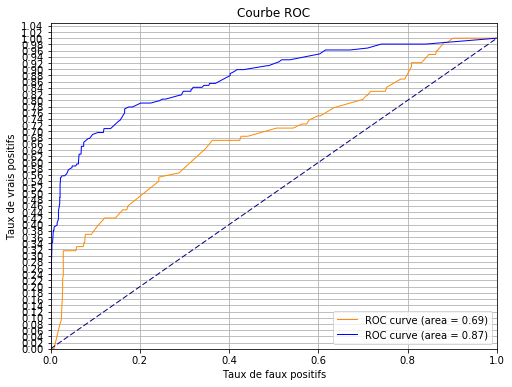

In [30]:
fpr_ab, tpr_ab, t = metrics.roc_curve(Y_test, preds_proba_ab)
fpr_ab_tr, tpr_ab_tr, t_tr = metrics.roc_curve(Y_train, preds_train_ab)
roc_auc_ab = metrics.auc(fpr_ab, tpr_ab)
roc_auc_ab_tr = metrics.auc(fpr_ab_tr, tpr_ab_tr)

roc_auc_ab

plt.figure(figsize=(8, 6))
lw = 1
plt.plot(fpr_ab, tpr_ab, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_ab)
plt.plot(fpr_ab_tr, tpr_ab_tr, color='blue', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_ab_tr)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.yticks(np.arange(0, 1.05, .02))
#plt.xticks(np.arange(0, 1, .05))
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.grid()
plt.legend(loc="lower right")
#plt.savefig('roc_dt.png')
plt.show()

In [228]:
t.shape
tpr_ab[np.where(fpr_ab == fpr_ab[fpr_ab >= .8][0])[0]]
#print(fpr_ab[fpr_ab >= .8][0])
print(tpr_ab[np.where(fpr_ab == fpr_ab[fpr_ab >= .8][0])[0]])

[ 0.89473684]


df_roc_2016 = pd.DataFrame({'Y_test_16' : Y_test, 'Preds_16' : preds_proba_ab})
df_roc_2016.to_csv('ROC_2016_mes71_2.csv', sep=';', index=None)

## CV

#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
#y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=4)
skf.get_n_splits(X_train_np, Y_train_np)

print(skf) 

max_auc = 0
i = 0
for m_d in [6, 7, 8, 9, 10] :
    for s_e in [.3] :
        for s_s in [.5, .6] :
            for n_e in [1, 3, 5, 7, 9] :
                for s_d in [.04] :
                    mean_auc = 0
                    for train_index, test_index in skf.split(X_train_np, Y_train_np):
                        #print("TRAIN:", train_index, "TEST:", test_index)
                        X_train_sp, X_test_sp = X_train_np[train_index], X_train_np[test_index]
                        y_train_sp, y_test_sp = Y_train_np[train_index], Y_train_np[test_index]
                        
                        i += 1
                        print('------', i)

                        clf_sp = AdaBoost(max_depth=m_d, seuil_equilibre=s_e, seuil_split_min_cl=.7, n_estimators=n_e, seuil_decision=.4, nb_min_max=n_e)
                        clf_sp.fit(X_train_sp, y_train_sp, sample_weight=s_s)
                        preds_sp = clf_sp.predict_proba(X_test_sp)

                        fpr_sp, tpr_sp, t_sp = metrics.roc_curve(y_test_sp, preds_sp)
                        auc_sp = metrics.auc(fpr_sp, tpr_sp)
                        mean_auc += auc_sp / 5
                    if (mean_auc > max_auc) :
                        max_auc = mean_auc

                        max_max_depth = m_d
                        max_seuil_equilibre = s_e
                        max_seuil_split_min_cl = s_s
                        max_n_estimators = n_e
                        max_seuil_decision = s_d
                        print(max_max_depth, max_seuil_equilibre, max_seuil_split_min_cl, max_n_estimators, max_seuil_decision, max_auc)
#3 0.3 0.7 10 0.04
## 6 0.3 0.3 10 0.04 0.61

for m_d in [5] :
    for s_e in [.3, .35, .4, .45, .5] :
        for s_s in [.7, .8, .85] :
            for n_e in [10, 20] :
max_max_depth, max_seuil_equilibre, max_seuil_split_min_cl, max_n_estimators, max_seuil_decision 
#(5, 0.3, 0.7, 20, 0.05) best param
#max_auc 
#0.85

In [50]:
Counter(Y_train_np)

Counter({0: 1362, 1: 158})

In [51]:
l2 = []

In [77]:
nb_min = (Y_train_np == 1).sum()
nb_max = len(Y_train_np) - nb_min
D = np.array(Y_train_np)
#D = .5 * np.array(list(map(lambda x : 1/nb_max if (x == 0) else 1/nb_min, D)))
D = np.array(list(map(lambda x : .6/nb_max if (x == 0) else .4/nb_min, D)))

In [90]:
clf_perso = DecisionTree(max_depth=6, seuil_equilibre=.3,seuil_split_min_cl=.7, seuil_decision=.1, nb_min_max=5)

clf_perso.fit(X_train_np, Y_train_np, None) #[:,[0, 21]]

In [91]:
preds = clf_perso.predict(X_test_np)
preds_pb = clf_perso.predict_proba(X_test_np)

preds_train = clf_perso.predict(X_train_np)

#print(iris.feature_names)
#print(clf.score(X_test, Y_test))
cm_ad_train = confusion_matrix(preds_train, Y_train)
cm_ad = confusion_matrix(preds, Y_test)

print('test cm : \n', cm_ad)
print('train cm : \n', cm_ad_train)

test cm : 
 [[469  36]
 [199  40]]
train cm : 
 [[1177   47]
 [ 185  111]]


In [88]:
fpr, tpr, _ = metrics.roc_curve(Y_test, preds_pb)
roc_auc = metrics.auc(fpr, tpr)
roc_auc
#df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
#ggplot(df, aes(x='fpr', y='tpr')) + geom_line() + geom_abline(linetype='dashed')

0.67172234478411597

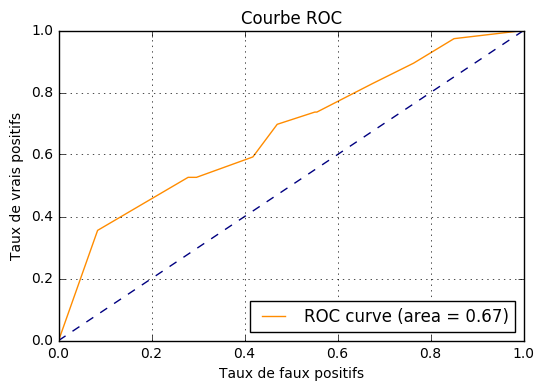

In [89]:
plt.figure()
lw = 1
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.grid()
plt.legend(loc="lower right")
#plt.savefig('roc_dt.png')
plt.show()
l2.append(roc_auc)

In [ ]:
plt.figure()
plt.plot([3, 4, 5, 6, 7, 8, 9], l2)
plt.xlabel( 'Profondeur de l\'arbre' )
plt.ylabel('AUC')
plt.grid()
plt.title('AUC en fonction de la profondeur de l\'arbre')
#plt.savefig('AUC_deph.png')
print(l2)

In [ ]:
#i=3
#X_test_np[24]

In [ ]:
i = i + 1
clf_perso.to_pdf('POL51_' + str(i) + '.pdf')
#graph.write_pdf('POL51' + str(i) + '.pdf')

In [ ]:
ab_clf = AdaBoostClassifier(DecisionTree(max_depth=4, seuil_equilibre=.4,seuil_split_min_cl=.8), n_estimators = 50, random_state=7, algorithm='SAMME')
#ab_clf = RandomForestClassifier(n_estimators=40, max_depth=None)
ab_clf.fit(X_train, Y_train)

preds_ad = ab_clf.predict(X_test)
preds_ad_train = ab_clf.predict(X_train)
print(ab_clf.score(X_train, Y_train))
print(ab_clf.score(X_test, Y_test))

In [ ]:
ylen = float(Y_train_np.size)
np.array(list(Counter(Y_train_np).values())) / ylen
#ylen 

In [ ]:
list(Counter(Y_train_np).values()) 

In [ ]:
#X_train.head()

In [ ]:
classe_y = X_train_cl[['classes', 'cor_att_exc']]#.to_csv('kmeans_y.csv', sep=';')

In [ ]:
#X_train_cl[['classes', 'cor_att_exc']].to_csv('kmeans_y.csv', sep=';')

In [ ]:
674 + 58
np.unique(np.random.choice([1, 2, 3, 4, 5], 5, p=[0.1, 0, 0.3, 0.6, 0]))

In [ ]:
674 / 732

In [ ]:
58 / 732
from math import log

In [ ]:
a = 1714
b = 285
ab = a + b
p_a = a / ab
p_b = b / ab
ln_pa = log(p_a, 2)
ln_pb = log(p_b, 2)
entr_1 = p_a * ln_pa + p_b * ln_pb

In [ ]:
a2 = 148
b2 = 107
ab2 = a2 + b2
p_a2 = a2 / ab2
p_b2 = b2 / ab2
ln_pa2 = log(p_a2, 2)
ln_pb2 = log(p_b2, 2)
entr_2 = p_a2 * ln_pa2 + p_b2 * ln_pb2

In [ ]:
total = ab + ab2
p_x_1 = ab / total
p_x_2 = 1 - p_x_1
s1 = p_x_1 * entr_1 + p_x_2 * entr_2
-s1

In [ ]:
1862 + 392  

In [ ]:
(1862 / 2254) * log((1862 / 2254), 2) + (392 / 2254) * log((392 / 2254), 2)

In [ ]:
0.558 * (1805 / 2254) + 0.9338 * (449 / 2254)

In [ ]:
#0.6328 (0.6350931 pour POL512 entropy)

In [11]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(iris.data, iris.target)
i=0

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
i = i + 1
graph.write_pdf('Setosa' + str(i) + '.pdf')

InvocationException: GraphViz's executables not found